In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
base_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()),'..', 'Base'))
if base_utils_path not in sys.path:
    sys.path.append(base_utils_path)
from utils import generate_combinations
import pandas as pd
from Combo_CC_Base import Combo_CC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
prod_x = prod_y = ['1','x','y']
rem_x = rem_y = ['1','x','y','x*y','x^2','y^2']
lists = [prod_x,rem_x,prod_y,rem_y]
k_values = [1,1,0,3]

df = generate_combinations(lists, k_values,['prod_x','rem_x','prod_y','rem_y'])
remarks = ['' for i in range(len(df))]
df['remarks'] = remarks
# Print the DataFrame
print(df.to_string())


    prod_x_item_1 rem_x_item_1 rem_y_item_1 rem_y_item_2 rem_y_item_3 remarks
0               1            1            1            x            y        
1               1            1            1            x          x*y        
2               1            1            1            x          x^2        
3               1            1            1            x          y^2        
4               1            1            1            y          x*y        
5               1            1            1            y          x^2        
6               1            1            1            y          y^2        
7               1            1            1          x*y          x^2        
8               1            1            1          x*y          y^2        
9               1            1            1          x^2          y^2        
10              1            1            x            y          x*y        
11              1            1            x            y        

In [7]:
remarks = ['' for i in range(len(df))]
for i in range(len(df)):
    if df.iloc[i]['prod_x_item_1']==df.iloc[i]['rem_x_item_1']:
        if not 'zero behaviour of x at origin,' in remarks[i]:
            remarks[i] += 'zero behaviour of x at origin,'
    if df.iloc[i]['prod_x_item_1']=='y':
        if df.iloc[i]['rem_x_item_1']=='y' or df.iloc[i]['rem_x_item_1']=='y^2' or df.iloc[i]['rem_x_item_1']=='x*y':
            if not 'y=0 is a line of fixed points' in remarks[i]:
                remarks[i] += 'y=0 is a line of fixed points,'
    rem_y_st = {df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2'],df.iloc[i]['rem_y_item_3']}
    if rem_y_st=={'x','x^2','x*y'}:
        remarks[i] += 'x=0 is a line of fixed points,'
    x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['rem_x_item_1']}
    y_set = {df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2'],df.iloc[i]['rem_y_item_3']}
    cm = Combo_CC([df.iloc[i]['prod_x_item_1']],[df.iloc[i]['rem_x_item_1']],[],[df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2'],df.iloc[i]['rem_y_item_3']],
                      parameter_placement='x', find_nullclines=False)
    if (not (cm.y in cm.P.free_symbols)) and (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'not connected,'
    elif (not (cm.y in cm.P.free_symbols)) or (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'no feedback,'


    if not(('y' in x_set) or ('y^2' in x_set) or ('x*y' in x_set)) and (not (('x' in y_set) or ('x^2' in y_set) or ('x*y' in y_set))):
        remarks[i] += 'not connected,'
    elif (not(('y' in x_set) or ('y^2' in x_set) or ('x*y' in x_set))) or (not (('x' in y_set) or ('x^2' in y_set) or ('x*y' in y_set))):
        remarks[i] += 'no feedback,'

df['remarks']=remarks
print(len(df[df['remarks']=='']))

162


In [8]:
print(df[df['remarks']==''][['prod_x_item_1','rem_x_item_1']].drop_duplicates().to_string())
print(len(df[df['remarks']==''][['prod_x_item_1','rem_x_item_1']].drop_duplicates()))

    prod_x_item_1 rem_x_item_1
40              1            y
60              1          x*y
100             1          y^2
160             x            y
180             x          x*y
220             x          y^2
240             y            1
260             y            x
320             y          x^2
9


In [9]:
remarks = df['remarks']
for i in range(len(df)):
    if df.iloc[i]['prod_x_item_1']=='x' and (df.iloc[i]['rem_x_item_1']=='y^2' or df.iloc[i]['rem_x_item_1']=='y'):
        if not '0 is not stable' in remarks[i]:
            remarks[i]+='0 is not stable,'
    if df.iloc[i]['prod_x_item_1']=='y':
        if df.iloc[i]['rem_x_item_1']=='x' or df.iloc[i]['rem_x_item_1']=='x^2':
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'

df['remarks']=remarks
print(len(df[df['remarks']=='']))

90


In [5]:
remarks = df['remarks']
scripts_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))
if scripts_utils_path not in sys.path:
    sys.path.append(scripts_utils_path)

from conditions_five import check_stability_only_decreasing_y
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1']],[df.iloc[i]['rem_x_item_1']],[],[df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2'],df.iloc[i]['rem_y_item_3']],
                      parameter_placement='x')
        dxdt,dydt = cm.P, cm.Q
        print(f'dxdt = {dxdt}')
        stab = check_stability_only_decreasing_y(cm,[0,0],verbose=False)
        if stab==False:
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'

df['remarks']=remarks
print(len(df[df['remarks']=='']))

dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 - dp1, -1]
stability determined by linear approximation: [dp0 - dp1, -1]
dxdt = x*(dp0*(1 - x/100) - dp1)
eigenvalues real part: [dp0 -

KeyboardInterrupt: 

In [11]:
remarks = df['remarks']
from conditions_five import check_stability_only_decreasing_y
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        if df.iloc[i]['prod_x_item_1']=='x' and df.iloc[i]['rem_x_item_1']=='1':
            if not 'another stable fp at all parameter values' in remarks[i]:
                remarks[i] += 'another stable fp at all parameter values,'
df['remarks']=remarks
print(len(df[df['remarks']=='']))

18


In [12]:
cms_remain = []
count = 0
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1']],[df.iloc[i]['rem_x_item_1']],[],[df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2'],df.iloc[i]['rem_y_item_3']],
                      parameter_placement='x')
        cms_remain.append(cm)
        print(f'{count} dx/dt = {cm.P} dy/dt = {cm.Q}')
        count += 1


0 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y - 1)
1 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - 1)
2 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - 1)
3 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - 1)
4 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y - 1)
5 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y - 1)
6 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - 1)
7 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - y**2 - 1)
8 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - y**2 - 1)
9 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y)
10 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y)
11 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x - y**2 - y)
12 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x*y - x - y**2)
13 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x - y**2)
14 dx/dt = x*(dp0*y*(1 - x/100) - dp1) dy/dt = y*(-x**2 - x*y - y)
15 dx/dt = x*(dp0*y*(1 - x/

plotting combo 1/18
plotting combo 2/18
plotting combo 3/18
plotting combo 4/18
plotting combo 5/18
plotting combo 6/18
plotting combo 7/18
plotting combo 8/18
plotting combo 9/18
plotting combo 10/18
plotting combo 11/18
plotting combo 12/18
plotting combo 13/18
plotting combo 14/18
plotting combo 15/18
plotting combo 16/18
plotting combo 17/18
plotting combo 18/18


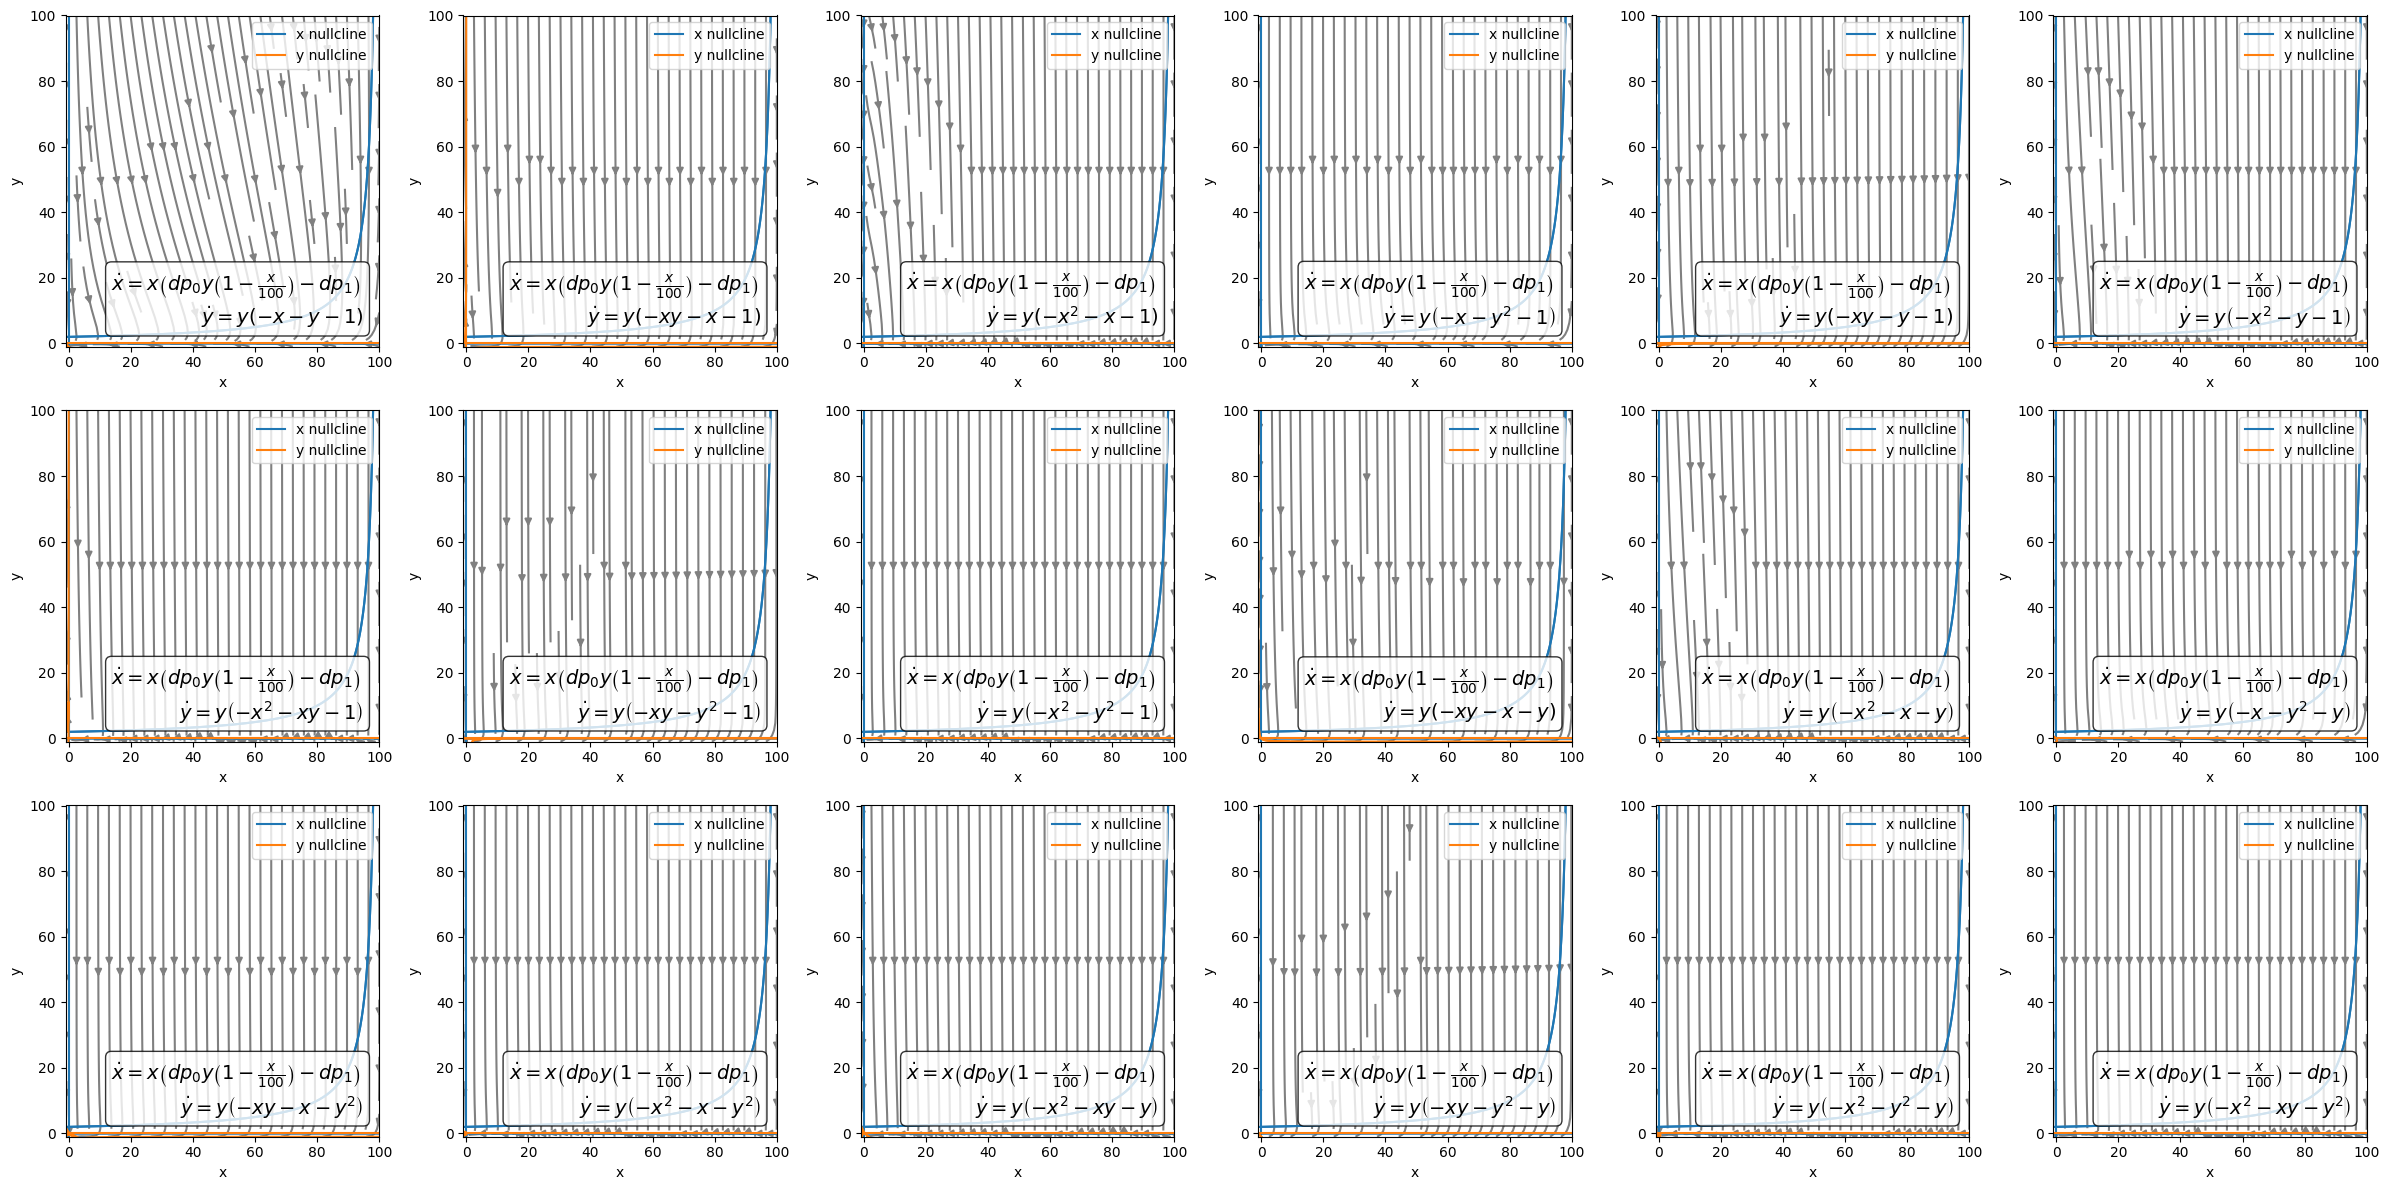

plotting combo 1/18
plotting combo 2/18
plotting combo 3/18
plotting combo 4/18
plotting combo 5/18
plotting combo 6/18
plotting combo 7/18
plotting combo 8/18
plotting combo 9/18
plotting combo 10/18
plotting combo 11/18
plotting combo 12/18
plotting combo 13/18
plotting combo 14/18
plotting combo 15/18
plotting combo 16/18
plotting combo 17/18
plotting combo 18/18


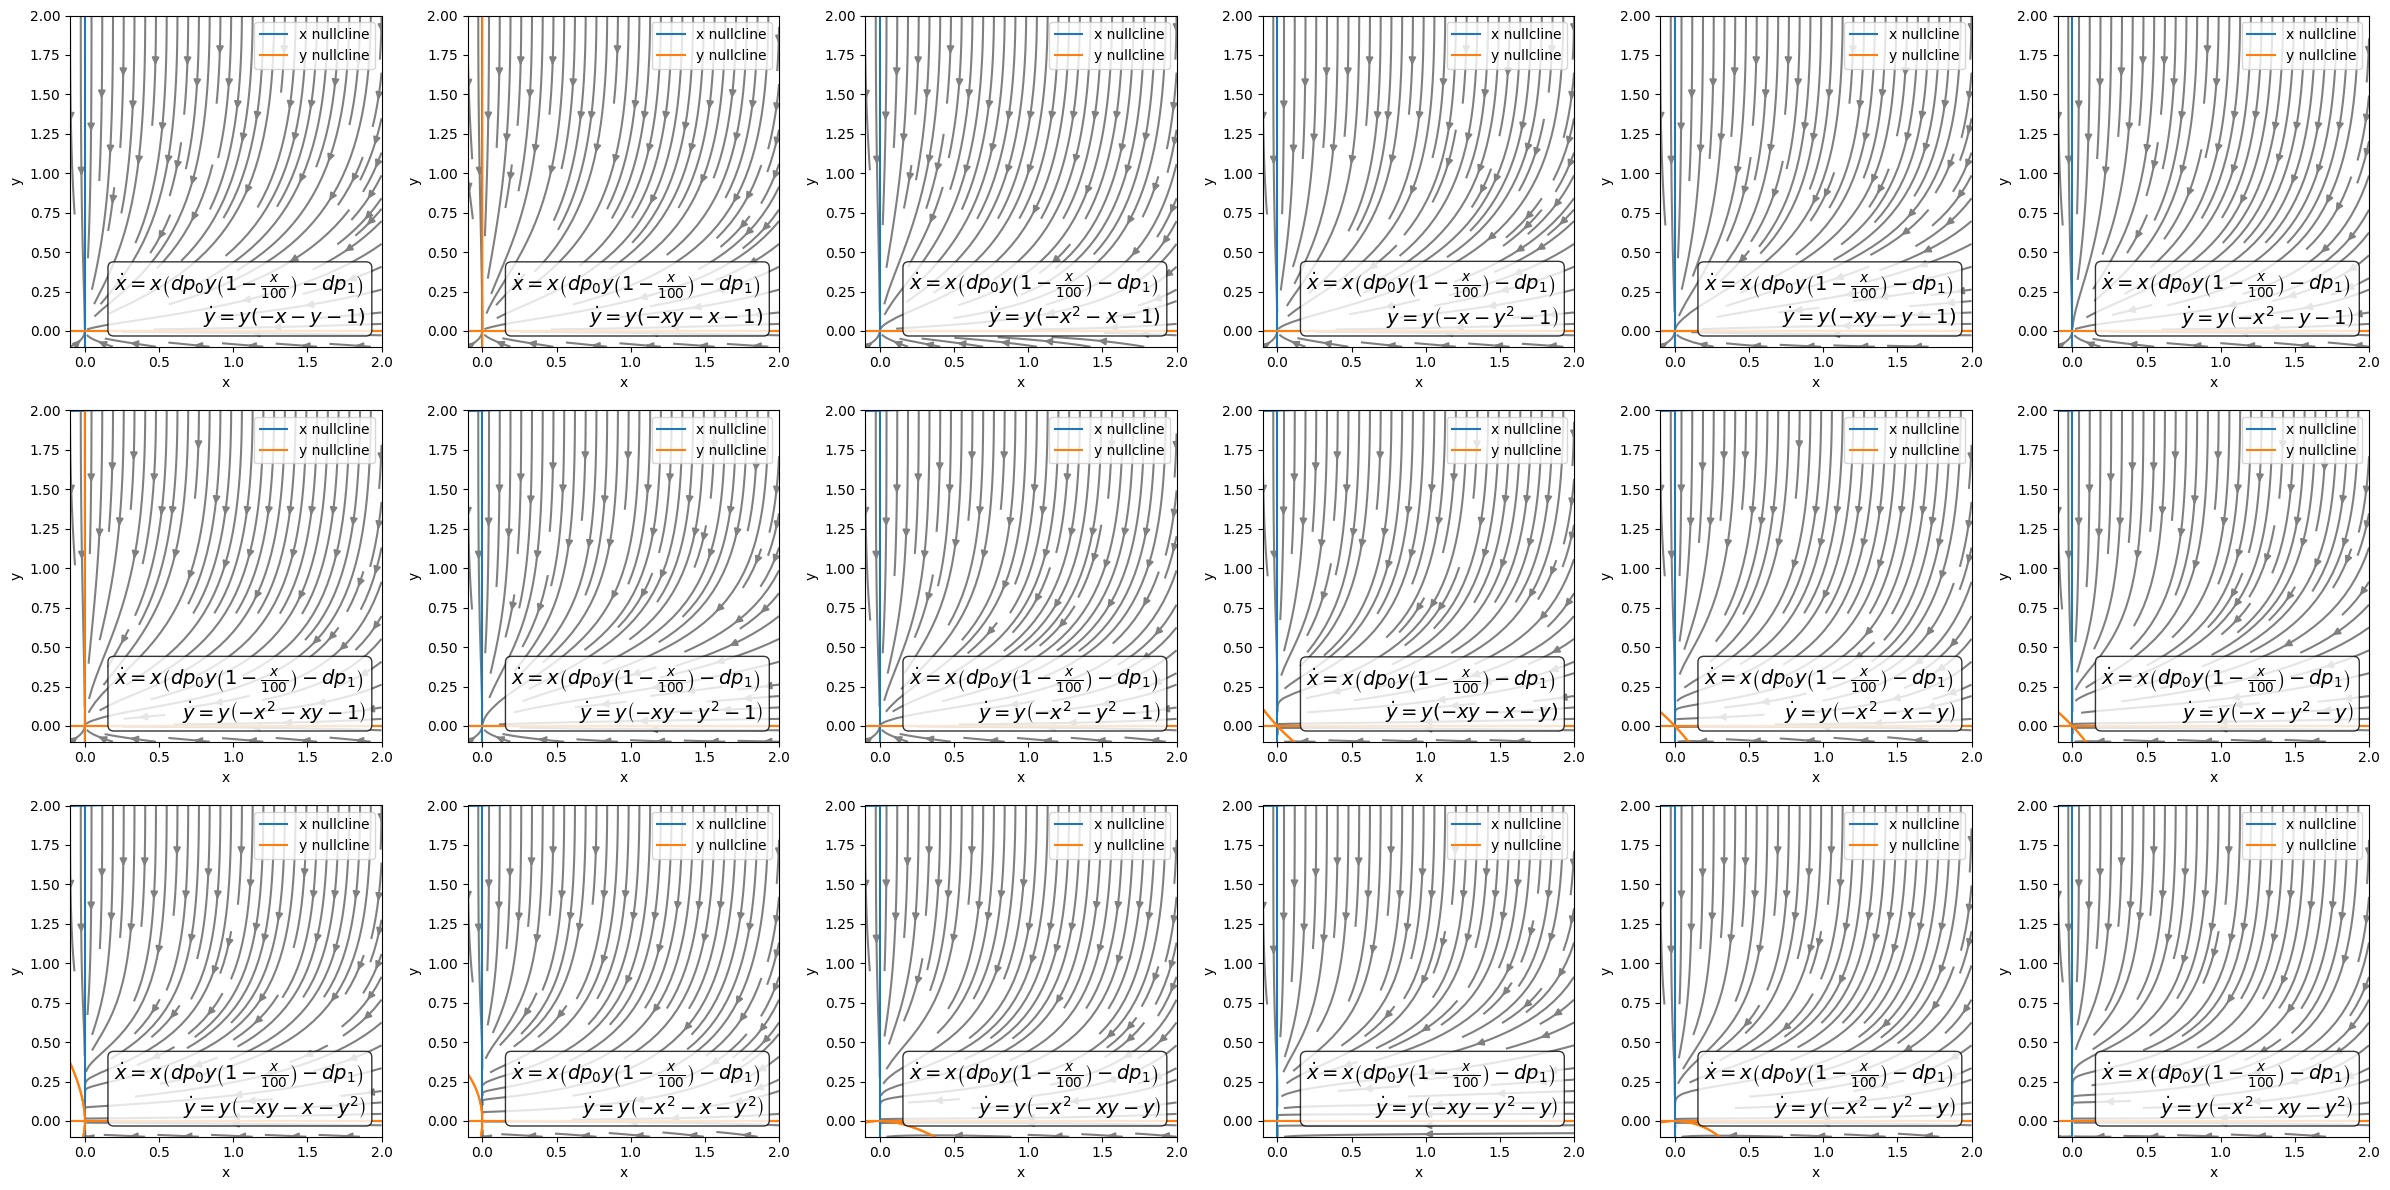

In [13]:

from utils import draw_combos_phase_portraits
ncols = 6
fig,axs=draw_combos_phase_portraits(cms_remain,{'dp0':1,'dp1':2},ncols,True,4,4,[-1,100],[-1,100])
for i in range(len(cms_remain),len(axs.flatten())):
    rw = int(i/ncols)
    col = i%ncols
    axs[rw,col].set_axis_off()
fig.savefig('figures/row1/combos_remain_zoom_out.png')
plt.show()
fig,axs = draw_combos_phase_portraits(cms_remain,{'dp0':1,'dp1':2},ncols,True,4,4,[-0.1,2],[-0.1,2])
for i in range(len(cms_remain),len(axs.flatten())):
    rw = int(i/ncols)
    col = i%ncols
    axs[rw,col].set_axis_off()
fig.savefig('figures/row1/combos_remain_zoom_in_on_zero.png')


In [ ]:
df.to_csv('../data/X1P1R_Y0P3R.csv')